In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
!pip install gender_guesser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 kB 9.8 MB/s eta 0:00:0000:01


In [38]:
data = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [33]:
data.Transported.value_counts()/data.shape[0]

Transported
True     0.503624
False    0.496376
Name: count, dtype: float64

In [5]:
def transform_bolean(data):
    
    return np.where(data == False, 0 , 1)

In [39]:
import gender_guesser.detector as gender
import warnings
warnings.filterwarnings('ignore')

X = data[['PassengerId', 'Name', 'HomePlanet', 'Destination', 'CryoSleep', 'Age', 
          'VIP', 'RoomService', 'Cabin', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
y = data['Transported']

X.loc[:, 'VIP'] = X.loc[:, 'VIP'].apply(transform_bolean)
X.loc[:, 'CryoSleep'] = X.loc[:, 'CryoSleep'].apply(transform_bolean)
y = y.apply(transform_bolean)

X[["Deck", "Cabin_num", "Side"]] = X["Cabin"].str.split("/", expand=True)

gd = gender.Detector()
X['NameGender'] = X['Name'].str.split(' ').str[0].map(gd.get_gender)

X['Group'] = X['PassengerId'].str.split('_').str[1]

expense_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'] 
X['total_spent'] = 0
for feat in expense_features:
    X['total_spent'] = X['total_spent'] + X[feat]

X = X.drop(['Cabin', 'Cabin_num', 'Name', 'PassengerId'], axis = 1)

In [40]:
X

,HomePlanet,Destination,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side,NameGender,Group,total_spent
0,Europa,TRAPPIST-1e,0,39.0,0,0.0,0.0,0.0,0.0,0.0,B,P,unknown,01,0.0
1,Earth,TRAPPIST-1e,0,24.0,0,109.0,9.0,25.0,549.0,44.0,F,S,unknown,01,736.0
2,Europa,TRAPPIST-1e,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,A,S,unknown,01,10383.0
3,Europa,TRAPPIST-1e,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,A,S,unknown,02,5176.0
4,Earth,TRAPPIST-1e,0,16.0,0,303.0,70.0,151.0,565.0,2.0,F,S,male,01,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,55 Cancri e,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,A,P,unknown,01,8536.0
8689,Earth,PSO J318.5-22,1,18.0,0,0.0,0.0,0.0,0.0,0.0,G,S,unknown,01,0.0
8690,Earth,TRAPPIST-1e,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,G,S,unknown,01,1873.0
8691,Europa,55 Cancri e,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,E,S,unknown,01,4637.0


In [41]:
X['NameGender'].unique()

array(['unknown', 'male', 'female', 'mostly_male', 'andy',
       'mostly_female'], dtype=object)

In [42]:
X['NameGender'] = np.where(X['NameGender'] == 'mostly_male', 'male', X['NameGender'])
X['NameGender'] = np.where(X['NameGender'] == 'mostly_female', 'female', X['NameGender'])
X['NameGender'] = np.where(X['NameGender'] == 'andy', 'unknown', X['NameGender'])
X['NameGender'].unique()

array(['unknown', 'male', 'female'], dtype=object)

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   Destination   8511 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8693 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Deck          8494 non-null   object 
 11  Side          8494 non-null   object 
 12  NameGender    8693 non-null   object 
 13  Group         8693 non-null   object 
 14  total_spent   7785 non-null   float64
dtypes: float64(7), object(8)
memory usage: 1018.8+ KB


In [44]:
X.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,total_spent
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,7785.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,1484.601541
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2845.288241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,736.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1486.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35987.000000


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer

# Models to try
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=0)

features_cat = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

features_num = X_train.select_dtypes(include=[np.number]).columns.tolist()

transformer_num = make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler()
)
transformer_cat = make_pipeline(
    #SimpleImputer(strategy="constant", fill_value="NA"),
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown='ignore'), 
    StandardScaler(with_mean=False)
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

models = {
    'XGBRegressor':XGBClassifier(),
    'LGBMRegressor':LGBMClassifier(),
    'CatBoostRegressor': CatBoostClassifier(verbose = False),
}

list_modelName=[]
list_predict=[]
for model_name, model in models.items():
    print("Model: " + model_name)
    pipe = Pipeline(steps=[("preprocessor", preprocessor), 
                           ("regressor", model)])
    pred=pipe.fit(X_train, y_train).predict(X_val) #predict
    
    score=accuracy_score(y_val, pred)
    
    list_modelName.append(model_name) #model name
    list_predict.append(score) #model score

models_scores=pd.DataFrame([list_modelName, list_predict]).T.rename(columns=({0:'Model', 1:'Score'})).sort_values('Score', ascending = False)
models_scores

Model: XGBRegressor
Model: LGBMRegressor
Model: CatBoostRegressor


,Model,Score
2,CatBoostRegressor,0.80391
1,LGBMRegressor,0.799885
0,XGBRegressor,0.787809


In [13]:
X_train

,HomePlanet,Destination,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side,NameGender,Group,total_spent
4278,Europa,55 Cancri e,0,54.0,0,0.0,559.0,0.0,15238.0,2799.0,C,S,unknown,01,18596.0
5971,Earth,TRAPPIST-1e,0,20.0,0,0.0,20.0,1.0,696.0,0.0,F,P,unknown,01,717.0
464,Mars,TRAPPIST-1e,0,43.0,0,1821.0,0.0,47.0,29.0,0.0,F,S,unknown,02,1897.0
4475,Earth,TRAPPIST-1e,0,24.0,0,185.0,0.0,476.0,1810.0,53.0,F,S,unknown,01,2524.0
8469,Europa,55 Cancri e,1,25.0,0,0.0,0.0,0.0,0.0,0.0,C,S,unknown,01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,Europa,55 Cancri e,1,32.0,0,0.0,0.0,0.0,0.0,0.0,B,P,unknown,01,0.0
7891,Earth,TRAPPIST-1e,0,22.0,0,0.0,0.0,6.0,0.0,733.0,F,S,unknown,01,739.0
4859,Mars,TRAPPIST-1e,0,29.0,0,523.0,0.0,21.0,4.0,811.0,E,S,unknown,01,1359.0
3264,Earth,TRAPPIST-1e,0,0.0,0,0.0,0.0,0.0,0.0,0.0,G,P,female,04,0.0


In [46]:
pd.DataFrame(preprocessor.fit_transform(X_train), columns = preprocessor.get_feature_names_out())

,pipeline-1__Age,pipeline-1__RoomService,pipeline-1__FoodCourt,pipeline-1__ShoppingMall,pipeline-1__Spa,pipeline-1__VRDeck,pipeline-1__total_spent,pipeline-2__HomePlanet_Earth,pipeline-2__HomePlanet_Europa,pipeline-2__HomePlanet_Mars,...,pipeline-2__NameGender_male,pipeline-2__NameGender_unknown,pipeline-2__Group_01,pipeline-2__Group_02,pipeline-2__Group_03,pipeline-2__Group_04,pipeline-2__Group_05,pipeline-2__Group_06,pipeline-2__Group_07,pipeline-2__Group_08
0,1.756210,-0.332701,0.072792,-0.277683,13.459452,2.217937,6.473466,0.000000,2.323147,0.000000,...,0.000000,2.791881,2.213213,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,-0.616445,-0.332701,-0.270197,-0.276100,0.355018,-0.262224,-0.258904,2.009069,0.000000,0.000000,...,0.000000,2.791881,2.213213,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.988586,2.326687,-0.282924,-0.203303,-0.246045,-0.262224,0.185427,0.000000,0.000000,2.468491,...,0.000000,2.791881,0.000000,2.709755,0.0,0.000000,0.0,0.0,0.0,0.0
3,-0.337309,-0.062527,-0.282924,0.475612,1.358892,-0.215261,0.421525,2.009069,0.000000,0.000000,...,0.000000,2.791881,2.213213,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,-0.267525,-0.332701,-0.282924,-0.277683,-0.272178,-0.262224,-0.528892,0.000000,2.323147,0.000000,...,0.000000,2.791881,2.213213,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6949,0.220962,-0.332701,-0.282924,-0.277683,-0.272178,-0.262224,-0.528892,0.000000,2.323147,0.000000,...,0.000000,2.791881,2.213213,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
6950,-0.476877,-0.332701,-0.282924,-0.268187,-0.272178,0.387279,-0.250620,2.009069,0.000000,0.000000,...,0.000000,2.791881,2.213213,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
6951,0.011611,0.431088,-0.282924,-0.244449,-0.268574,0.456394,-0.017158,0.000000,0.000000,2.468491,...,0.000000,2.791881,2.213213,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
6952,-2.012124,-0.332701,-0.282924,-0.277683,-0.272178,-0.262224,-0.528892,2.009069,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,6.181812,0.0,0.0,0.0,0.0


In [47]:
cat_clas = CatBoostClassifier(verbose = False,
                             learning_rate = 0.01,
                             iterations = 2000)

pipe = Pipeline(steps=[("preprocessor", preprocessor), 
                       ("classifier", cat_clas)])
pipe.fit(X_train, y_train)

y_pred = pipe.predict_proba(X_val)[:,1]

y_pred_trans = np.where(y_pred > 0.5, 1, 0)

score = accuracy_score(y_val, y_pred_trans)
print(f'Accuracy Score on Test set: {score}') 

Accuracy Score on Test set: 0.8039102932719954


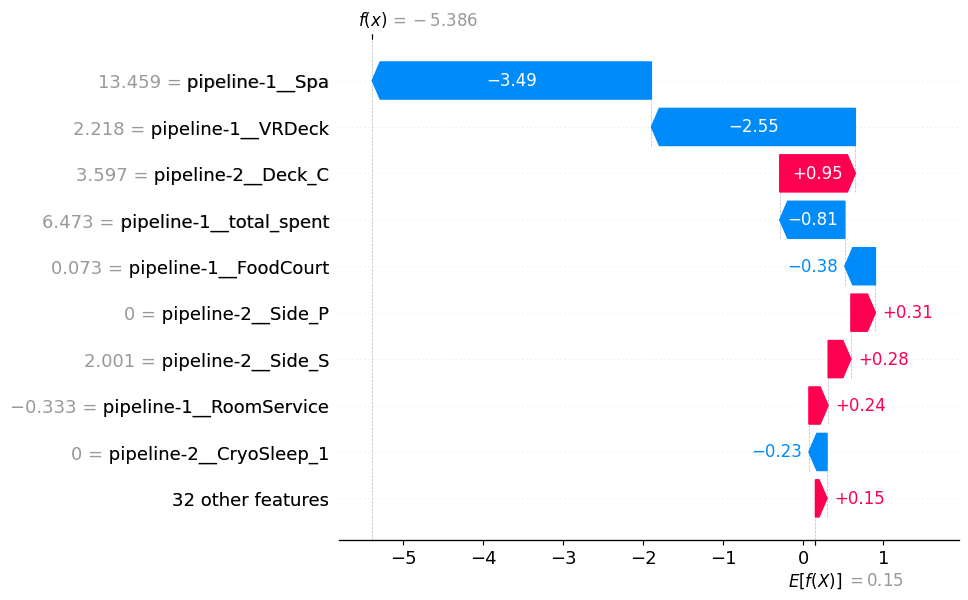

In [19]:
import shap

explainer = shap.TreeExplainer(pipe['classifier'])

#apply the preprocessing to X_train
X_train_trans = pd.DataFrame(preprocessor.fit_transform(X_train), columns = preprocessor.get_feature_names_out())

shap_values_indiv = explainer(X_train_trans)

# The influence of each model feature contributed to the prediction of the observation ZERO.
shap.plots.waterfall(shap_values_indiv[0])

In [20]:
shap.initjs() 

#Don't run in kaggle notebook
shap.plots.force(shap_values_indiv[0])

In [32]:
#First we create de "explainer", the function that will "explain" what is happening in our model
#set the tree explainer as the model of the pipeline. 
# TreeExplainer is better than simple Explainer for tree models (as catboost)
# In this part we must pass to the function the model we are using
explainer = shap.TreeExplainer(pipe['classifier'])

#apply the preprocessing to X_train
X_train_trans = pd.DataFrame(preprocessor.fit_transform(X_train), columns = preprocessor.get_feature_names_out())

#get Shap values from preprocessed data
shap_values = explainer(X_train_trans)

#plot the feature importance
#shap.summary_plot(shap_values, X_train_trans, plot_type="bar")

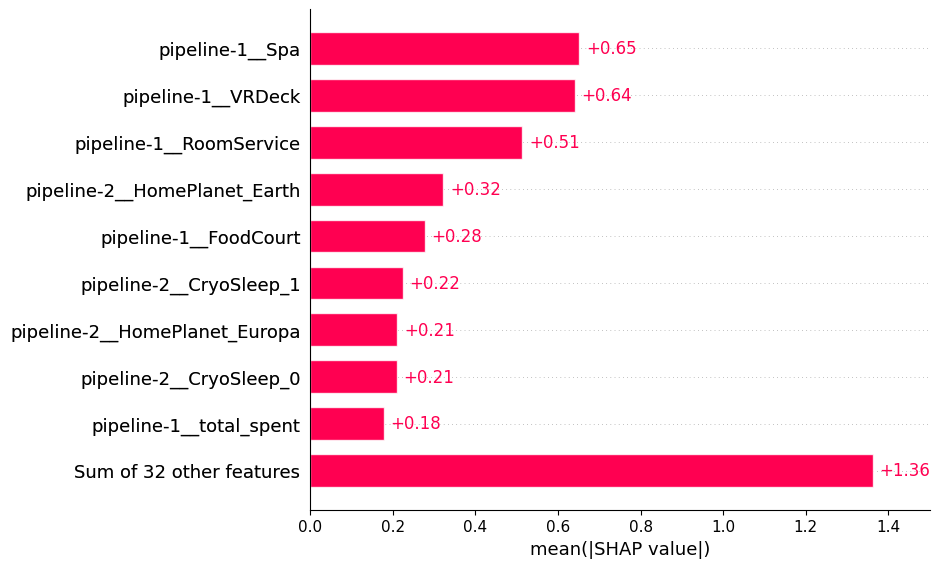

In [33]:
#absolute mean of how each feature influences in the prediction
#this chart rank which features influence more in the model
shap.plots.bar(shap_values)

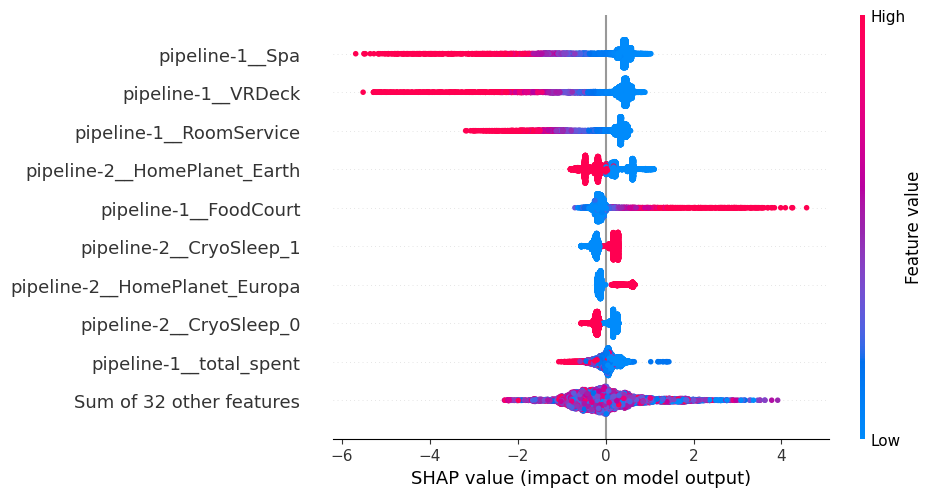

In [34]:
# the colors represent the feature values: 
# For example: in the Spa feature, higher values -> lower probability of being saved
shap.plots.beeswarm(shap_values)

https://www.youtube.com/watch?v=L8_sVRhBDLU

In [30]:
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

test.loc[:, 'VIP'] = test.loc[:, 'VIP'].apply(transform_bolean)
test.loc[:, 'CryoSleep'] = test.loc[:, 'CryoSleep'].apply(transform_bolean)

test[["Deck", "Cabin_num", "Side"]] = test["Cabin"].str.split("/", expand=True)
test = test.drop(['Cabin', 'Cabin_num'], axis = 1)

gd = gender.Detector()
test['NameGender'] = test['Name'].str.split(' ').str[0].map(gd.get_gender)

test['Group'] = test['PassengerId'].str.split('_').str[1]

expense_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'] 
test['total_spent'] = 0
for feat in expense_features:
    test['total_spent'] = test['total_spent'] + test[feat]

pipe.fit(X, y)
p = pipe.predict(test)

y_pred = pipe.predict_proba(X_val)[:,1]

y_pred_trans = np.where(y_pred > 0.5, 1, 0)

p = np.where(p == 0, False, True)

d = {'PassengerId': test['PassengerId'], 'Transported': p} 

predictions = pd.DataFrame(d)
predictions.to_csv("/kaggle/working/submission.csv", index=False)